# Part 2:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

# Loading and splitting Dataset

In [4]:
# Loading Dataset
url = "Part2_data12.csv"
dataset = pd.read_csv(url)

In [16]:
#Shape : Dimensions of the dataset
print("Dimension = {0:d}*{1:d}".format(dataset.shape[0],dataset.shape[1]))

Dimension = 220*2


# Randomly mix the dataset by the function simple

In [17]:
dataframe = pd.DataFrame(dataset)
dataframe_mixed = dataframe.sample(frac=1)
# dataframe_mixed

# We take 70% as a training data and 30% as a testing data

In [18]:
training_dataset_df = dataframe_mixed[:int(len(dataframe)*0.7)]
# training_dataset

testing_dataset_df  = dataframe_mixed[int(len(dataframe)*0.7):len(dataframe)]
# testing_dataset

# Saving training and testing dataset to a cqsv files
training_dataset_df.to_csv(r'training_dataset_part2.csv', index=False, header=True)
testing_dataset_df.to_csv(r'testing_dataset_part2.csv'  , index=False, header=True)

#  Read and visualize the given data.

In [38]:
training_dataset_url = "training_dataset_part2.csv"
testing_dataset_url  = "testing_dataset_part2.csv"

training_dataset = pd.read_csv(training_dataset_url)
testing_dataset  = pd.read_csv(testing_dataset_url)

# Give the mean/median/min/max for each feature.

In [39]:
# Calculation of the mean of x
print("mean(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).mean())))

# Calculation of the median of x
print("median(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).median())))

# Calculation of the max of x
print("max(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).max())))

# Calculation of the min of x
print("min(x) = {:.2f}".format(float(pd.DataFrame(dataset['x']).min())))

mean(x) = 0.95
median(x) = 0.95
max(x) = 11.90
min(x) = -10.00


# Use scatter plot to represent your training dataset.

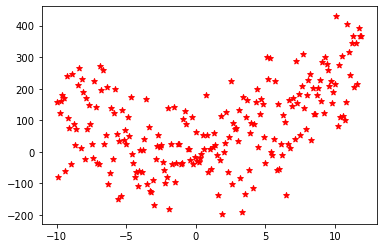

In [5]:
# Plotting the training dataset
plt.scatter(training_dataset['x'], training_dataset['y'], c = 'red', marker = '*')

# Question2: Build the Polynomial regression algorithm of degree k ≥ 2

# The hypothesis function. 

In [43]:
# The hypothesis function. 
def h(x,w):
    polynom = float(0)
    for i in range(len(w)):
        polynom = polynom + w[i]*pow(x,i)
    return polynom

# The empirical error

In [44]:
# The empirical error MSE
def MSE(w,d_set):
    MSE = 0
    for i in range(len(d_set)):
        MSE = MSE + pow((d_set['y'][i] - h(d_set['x'][i],w)),2)
    return MSE/len(d_set)

# Armijo learning rate

In [45]:
# Calculation of the step Armijo
def armijo(wk, dk, d_set, empiricalError = MSE):
    alpha = 1
    X = 0.25*alpha*np.matmul(gradient(wk, d_set,empiricalError), dk)
    while empiricalError(np.add(wk, np.multiply(alpha,dk)), d_set) - empiricalError(wk, d_set) > X:
        alpha = alpha/2
        X = 0.25*alpha*np.matmul(gradient(wk, d_set,empiricalError), dk)
    return alpha

# Calculation of the gradient

In [214]:
# Calculation of the gradient
def gradient(w, d_set, empiricalError = MSE):
    grad = []
    wi = [float(0) for i in range(len(w))]
    for i in range(len(w)):
        for k in range(len(w)):
            wi[k] = w[k]
        wi[i] = wi[i] + 1e-10
        grad.append((empiricalError(wi,d_set) - empiricalError(w,d_set))/1e-10)
    return grad

In [227]:
# Plotting the training dataset with hypotesis function
def plot_h(w,df):
    plt.scatter(df['x'], df['y'], c = 'red', marker = '*')
    x   = []
    h_x = []
    k = int(df['x'].min())-1
    while int(df['x'].max())+2>k : 
        x.append(k)
        h_x.append(h(k,w))
        k = k + 0.5
    plt.plot(x, h_x, linewidth=4)

# Gradient Descent Method

In [281]:
# Gradient descent method
def gradientDescent(delta, degree, d_set, armij=False,alpha=0,empiricalError=MSE):
    wk = [float(0) for i in range(degree+1)]
    gk = np.multiply(-1,gradient(wk, d_set, empiricalError))
    k = 0
    while np.linalg.norm(gk)>delta:
        if k>500:
            break
        print("k = {0:d}, norm = {1:.2f}, MSE = {1:.2f}".format(k,np.linalg.norm(gk),empiricalError(wk,d_set)))
        if armij == True:
            alpha = armijo(wk,gk, d_set)
        wk = np.add(wk, np.multiply(alpha,gk))
        gk = np.multiply(-1,gradient(wk, d_set, empiricalError))
        k = k+1
    return wk

In [282]:
# Calculation of polynomial regression with degree 2
degree = 2
# Using alpha = 0.02 as a learning rate
w_optim_002    = gradientDescent(0.1, degree, training_dataset, alpha  = 0.02)
print("=====================")
# Armijo's learning rate
w_optim_armijo = gradientDescent(0.1, degree, training_dataset, armij = True)

k = 0, norm = 10616.58, MSE = 10616.58
k = 1, norm = 1179523.86, MSE = 1179523.86
k = 2, norm = 122192321.84, MSE = 122192321.84
k = 0, norm = 10616.58, MSE = 10616.58
k = 1, norm = 3928.27, MSE = 3928.27
k = 2, norm = 1468.95, MSE = 1468.95
k = 3, norm = 587.15, MSE = 587.15
k = 4, norm = 309.16, MSE = 309.16
k = 5, norm = 413.24, MSE = 413.24
k = 6, norm = 258.83, MSE = 258.83
k = 7, norm = 606.02, MSE = 606.02
k = 8, norm = 294.23, MSE = 294.23
k = 9, norm = 415.72, MSE = 415.72
k = 10, norm = 237.51, MSE = 237.51
k = 11, norm = 300.91, MSE = 300.91
k = 12, norm = 204.51, MSE = 204.51
k = 13, norm = 424.55, MSE = 424.55
k = 14, norm = 221.94, MSE = 221.94
k = 15, norm = 298.04, MSE = 298.04
k = 16, norm = 185.04, MSE = 185.04
k = 17, norm = 438.00, MSE = 438.00
k = 18, norm = 211.42, MSE = 211.42
k = 19, norm = 299.93, MSE = 299.93
k = 20, norm = 170.11, MSE = 170.11
k = 21, norm = 216.63, MSE = 216.63
k = 22, norm = 146.23, MSE = 146.23
k = 23, norm = 306.56, MSE = 306.56
k = 24, n

k = 236, norm = 6.88, MSE = 6.88
k = 237, norm = 4.30, MSE = 4.30
k = 238, norm = 9.87, MSE = 9.87
k = 239, norm = 5.08, MSE = 5.08
k = 240, norm = 7.01, MSE = 7.01
k = 241, norm = 4.23, MSE = 4.23
k = 242, norm = 10.11, MSE = 10.11
k = 243, norm = 5.18, MSE = 5.18
k = 244, norm = 7.19, MSE = 7.19
k = 245, norm = 4.41, MSE = 4.41
k = 246, norm = 5.61, MSE = 5.61
k = 247, norm = 3.99, MSE = 3.99
k = 248, norm = 7.82, MSE = 7.82
k = 249, norm = 4.56, MSE = 4.56
k = 250, norm = 5.86, MSE = 5.86
k = 251, norm = 4.10, MSE = 4.10
k = 252, norm = 8.40, MSE = 8.40
k = 253, norm = 4.65, MSE = 4.65
k = 254, norm = 6.04, MSE = 6.04
k = 255, norm = 4.15, MSE = 4.15
k = 256, norm = 8.93, MSE = 8.93
k = 257, norm = 4.87, MSE = 4.87
k = 258, norm = 6.47, MSE = 6.47
k = 259, norm = 4.28, MSE = 4.28
k = 260, norm = 9.81, MSE = 9.81
k = 261, norm = 4.99, MSE = 4.99
k = 262, norm = 6.94, MSE = 6.94
k = 263, norm = 4.25, MSE = 4.25
k = 264, norm = 10.02, MSE = 10.02
k = 265, norm = 5.02, MSE = 5.02
k = 26

k = 484, norm = 4.58, MSE = 4.58
k = 485, norm = 6.35, MSE = 6.35
k = 486, norm = 3.91, MSE = 3.91
k = 487, norm = 9.25, MSE = 9.25
k = 488, norm = 4.63, MSE = 4.63
k = 489, norm = 6.57, MSE = 6.57
k = 490, norm = 3.95, MSE = 3.95
k = 491, norm = 5.08, MSE = 5.08
k = 492, norm = 3.57, MSE = 3.57
k = 493, norm = 7.58, MSE = 7.58
k = 494, norm = 4.15, MSE = 4.15
k = 495, norm = 5.51, MSE = 5.51
k = 496, norm = 3.80, MSE = 3.80
k = 497, norm = 8.26, MSE = 8.26
k = 498, norm = 4.39, MSE = 4.39
k = 499, norm = 6.05, MSE = 6.05
k = 500, norm = 3.95, MSE = 3.95


In [283]:
w_optim_002

array([  48503.04903812,  -98383.61511356, 2418041.62214976])

In [284]:
MSE(w_optim_002,training_dataset)

1.6346825524226044e+16

In [285]:
w_optim_armijo

array([-0.90601748,  3.61300767,  1.79415149])

In [286]:
MSE(w_optim_armijo,training_dataset)

9653.745705116098

# Plot function

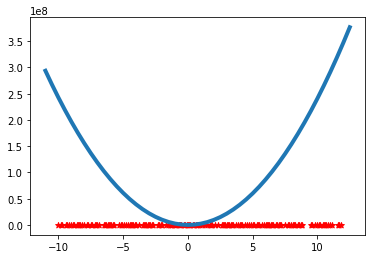

In [287]:
# alpha  = 0.01
plot_h(w_optim_002,training_dataset)

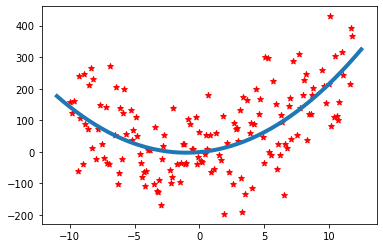

In [288]:
# armijo
plot_h(w_optim_armijo,training_dataset)

# Question6: Now, evaluate your models with the testing dataset and return the generalization error. 

In [295]:
# Calculation of the general error for our 4 models
# the model with alpha = 0.02
MSE_alpha002 = MSE(w_optim_002   , testing_dataset)
print("MSE = {0:.2f}".format(MSE_alpha002))
# the model with armijo learning rate
MSE_armijo   = MSE(w_optim_armijo, testing_dataset)
print("MSE = {0:.2f}".format(MSE_armijo))

MSE = 23045592350168776.00
MSE = 9608.76


Calculation of the bias and variance

In [254]:
# Bias
def bias(w,d_set):
    Bias = 0
    for i in range(len(d_set)):
        Bias = Bias + pow(h(d_set['x'][i],w) - d_set['y'][i],2)
    return np.sqrt(Bias)
# Variance
def variance(w,d_set):
    mean_Ypred = 0
    for i in range(len(d_set)):
        mean_Ypred = mean_Ypred + h(d_set['x'][i],w)
    mean_Ypred = mean_Ypred/len(d_set)
    Var = 0
    for i in range(len(d_set)):
        Var = Var + pow(h(d_set['x'][i],w) - mean_Ypred,2)
    return Var/len(d_set)

In [257]:
print("model 1 Bias = {0:.2f}".format(bias(w_optim_002,dataframe)))
print("model 2 Bias = {0:.2f}".format(bias(w_optim_armijo,dataframe)))

model 1 Bias = 2009582102.29
model 2 Bias = 1456.79


In [258]:
print("model 1 Variance = {0:.2f}".format(variance(w_optim_002,dataframe)))
print("model 2 Variance = {0:.2f}".format(variance(w_optim_armijo,dataframe)))

model 1 Variance = 8423776315612232.00
model 2 Variance = 6077.58


# Question8: Now, choose two other values of degree k, fit and evaluate your models.

In [296]:
# Calculation of polynomial regression with degree 2
degree = 3
# Using alpha = 0.02 as a learning rate
w_optim_002_3    = gradientDescent(0.1, degree, training_dataset, alpha  = 0.02) 
# Armijo's learning rate
w_optim_armijo_3 = gradientDescent(0.1, degree, training_dataset, armij = True)

k = 0, norm = 57489.68, MSE = 57489.68
k = 1, norm = 575543400.31, MSE = 575543400.31
k = 0, norm = 57489.68, MSE = 57489.68
k = 1, norm = 8314.64, MSE = 8314.64
k = 2, norm = 29698.52, MSE = 29698.52
k = 3, norm = 6935.03, MSE = 6935.03
k = 4, norm = 30720.13, MSE = 30720.13
k = 5, norm = 4979.45, MSE = 4979.45
k = 6, norm = 15942.48, MSE = 15942.48
k = 7, norm = 4170.03, MSE = 4170.03
k = 8, norm = 16424.86, MSE = 16424.86
k = 9, norm = 2986.47, MSE = 2986.47
k = 10, norm = 17095.51, MSE = 17095.51
k = 11, norm = 2163.26, MSE = 2163.26
k = 12, norm = 8791.20, MSE = 8791.20
k = 13, norm = 1793.68, MSE = 1793.68
k = 14, norm = 9127.08, MSE = 9127.08
k = 15, norm = 1294.28, MSE = 1294.28
k = 16, norm = 4710.50, MSE = 4710.50
k = 17, norm = 1079.45, MSE = 1079.45
k = 18, norm = 4874.95, MSE = 4874.95
k = 19, norm = 777.34, MSE = 777.34
k = 20, norm = 2527.79, MSE = 2527.79
k = 21, norm = 651.83, MSE = 651.83
k = 22, norm = 2605.06, MSE = 2605.06
k = 23, norm = 470.25, MSE = 470.25
k = 24

k = 226, norm = 1146.63, MSE = 1146.63
k = 227, norm = 77.94, MSE = 77.94
k = 228, norm = 133.02, MSE = 133.02
k = 229, norm = 126.04, MSE = 126.04
k = 230, norm = 119.64, MSE = 119.64
k = 231, norm = 113.89, MSE = 113.89
k = 232, norm = 108.80, MSE = 108.80
k = 233, norm = 104.03, MSE = 104.03
k = 234, norm = 99.88, MSE = 99.88
k = 235, norm = 96.04, MSE = 96.04
k = 236, norm = 92.60, MSE = 92.60
k = 237, norm = 89.58, MSE = 89.58
k = 238, norm = 86.70, MSE = 86.70
k = 239, norm = 84.20, MSE = 84.20
k = 240, norm = 161.45, MSE = 161.45
k = 241, norm = 66.95, MSE = 66.95
k = 242, norm = 1271.92, MSE = 1271.92
k = 243, norm = 79.87, MSE = 79.87
k = 244, norm = 143.61, MSE = 143.61
k = 245, norm = 66.48, MSE = 66.48
k = 246, norm = 1097.10, MSE = 1097.10
k = 247, norm = 76.24, MSE = 76.24
k = 248, norm = 128.45, MSE = 128.45
k = 249, norm = 121.86, MSE = 121.86
k = 250, norm = 115.76, MSE = 115.76
k = 251, norm = 110.18, MSE = 110.18
k = 252, norm = 105.27, MSE = 105.27
k = 253, norm = 1

k = 454, norm = 61.57, MSE = 61.57
k = 455, norm = 168.27, MSE = 168.27
k = 456, norm = 57.22, MSE = 57.22
k = 457, norm = 690.98, MSE = 690.98
k = 458, norm = 61.64, MSE = 61.64
k = 459, norm = 171.71, MSE = 171.71
k = 460, norm = 57.09, MSE = 57.09
k = 461, norm = 692.88, MSE = 692.88
k = 462, norm = 61.47, MSE = 61.47
k = 463, norm = 172.46, MSE = 172.46
k = 464, norm = 56.77, MSE = 56.77
k = 465, norm = 700.74, MSE = 700.74
k = 466, norm = 61.48, MSE = 61.48
k = 467, norm = 173.99, MSE = 173.99
k = 468, norm = 56.52, MSE = 56.52
k = 469, norm = 707.57, MSE = 707.57
k = 470, norm = 61.34, MSE = 61.34
k = 471, norm = 175.09, MSE = 175.09
k = 472, norm = 56.49, MSE = 56.49
k = 473, norm = 727.93, MSE = 727.93
k = 474, norm = 61.45, MSE = 61.45
k = 475, norm = 180.58, MSE = 180.58
k = 476, norm = 56.26, MSE = 56.26
k = 477, norm = 732.94, MSE = 732.94
k = 478, norm = 61.38, MSE = 61.38
k = 479, norm = 182.22, MSE = 182.22
k = 480, norm = 56.04, MSE = 56.04
k = 481, norm = 749.32, MSE =

In [297]:
# Calculation of the general error for our 2 models
# the model with alpha = 0.02
MSE_alpha002_3 = MSE(w_optim_002_3   , testing_dataset)
print("MSE = {0:.2f}".format(MSE_alpha002))
# the model with armijo learning rate
MSE_armijo_3   = MSE(w_optim_armijo_3, testing_dataset)
print("MSE = {0:.2f}".format(MSE_armijo))

MSE = 23045592350168776.00
MSE = 9608.76


In [292]:
print("model 1 Bias = {0:.2f}".format(bias(w_optim_002_3,dataframe)))
print("model 2 Bias = {0:.2f}".format(bias(w_optim_armijo_3,dataframe)))

print("model 1 Variance = {0:.2f}".format(variance(w_optim_002_3,dataframe)))
print("model 2 Variance = {0:.2f}".format(variance(w_optim_armijo_3,dataframe)))

model 1 Bias = 92549991830.23
model 2 Bias = 1461.17
model 1 Variance = 37104159838840578048.00
model 2 Variance = 6010.81


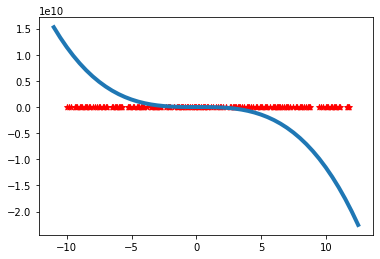

In [304]:
plot_h(w_optim_002_3,training_dataset)

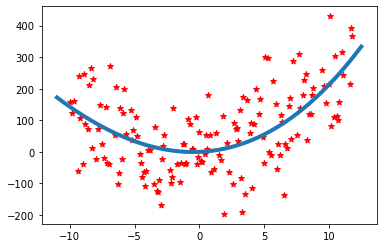

In [306]:
plot_h(w_optim_armijo_3,training_dataset)

In [ ]:
# Calculation of polynomial regression with degree 2
degree = 4
# Using alpha = 0.02 as a learning rate
w_optim_002_4    = gradientDescent(0.1, degree, training_dataset, alpha  = 0.02) 
# Armijo's learning rate
w_optim_armijo_4 = gradientDescent(0.1, degree, training_dataset, armij = True)

In [300]:
# Calculation of the general error for our 4 models
# the model with alpha = 0.02
MSE_alpha002_4 = MSE(w_optim_002_4   , testing_dataset)
print("MSE = {0:.2f}".format(MSE_alpha002_4))
# the model with armijo learning rate
MSE_armijo_4   = MSE(w_optim_armijo_4, testing_dataset)
print("MSE = {0:.2f}".format(MSE_armijo_4))

MSE = 18160769368478075973793742848.00
MSE = 11673.45


In [301]:
print("model 1 Bias = {0:.2f}".format(bias(w_optim_002_4,dataframe)))
print("model 2 Bias = {0:.2f}".format(bias(w_optim_armijo_4,dataframe)))

print("model 1 Variance = {0:.2f}".format(variance(w_optim_002_4,dataframe)))
print("model 2 Variance = {0:.2f}".format(variance(w_optim_armijo_4,dataframe)))

model 1 Bias = 1704433840974372.75
model 2 Bias = 1560.69
model 1 Variance = 8905405019283171162231668736.00
model 2 Variance = 7571.77


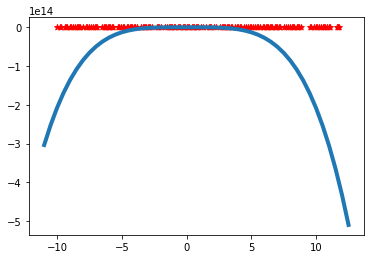

In [302]:
plot_h(w_optim_002_4,training_dataset)

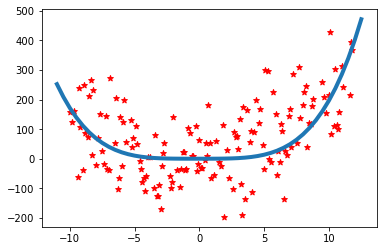

In [303]:
plot_h(w_optim_armijo_4,training_dataset)

# Degree 2

In [313]:
MSE_armijo   = MSE(w_optim_armijo, testing_dataset)
print("MSE      = {0:.2f}".format(MSE_armijo))
print("Bias     = {0:.2f}".format(bias(w_optim_armijo,dataframe)))
print("Variance = {0:.2f}".format(variance(w_optim_armijo,dataframe)))

MSE      = 9608.76
Bias     = 1456.32
Variance = 6177.49


# Degree 3

In [314]:
MSE_armijo_3   = MSE(w_optim_armijo_3, testing_dataset)
print("MSE      = {0:.2f}".format(MSE_armijo_3))
print("Bias     = {0:.2f}".format(bias(w_optim_armijo_3,dataframe)))
print("Variance = {0:.2f}".format(variance(w_optim_armijo_3,dataframe)))

MSE      = 9644.99
Bias     = 1461.17
Variance = 6010.81


# Degree 4

In [315]:
MSE_armijo_4   = MSE(w_optim_armijo_4, testing_dataset)
print("MSE      = {0:.2f}".format(MSE_armijo_4))
print("Bias     = {0:.2f}".format(bias(w_optim_armijo_4,dataframe)))
print("Variance = {0:.2f}".format(variance(w_optim_armijo_4,dataframe)))

MSE      = 11673.45
Bias     = 1560.69
Variance = 7571.77
